In [ ]:
# reference: https://huggingface.co/pirocheto/phishing-url-detection

In [ ]:
!pip install onnxruntime
!pip install huggingface_hub
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 949.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import onnxruntime
from huggingface_hub import hf_hub_download

REPO_ID = "pirocheto/phishing-url-detection"
FILENAME = "model.onnx"
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)

model.onnx:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

In [ ]:
# Initializing the ONNX Runtime session with the pre-trained model
sess = onnxruntime.InferenceSession(
    model_path,
    providers=["CPUExecutionProvider"],
)

In [ ]:
urls = [
    "https://clubedemilhagem.com/home.php",
    "http://www.medicalnewstoday.com/articles/188939.php",
]
inputs = np.array(urls, dtype="str")

In [ ]:
# Using the ONNX model to make predictions on the input data
results = sess.run(None, {"inputs": inputs})[1]

for url, proba in zip(urls, results):
    print(f"URL: {url}")
    print(f"Likelihood of being a phishing site: {proba[1] * 100:.2f} %")
    print("----")

URL: https://clubedemilhagem.com/home.php
Likelihood of being a phishing site: 99.47 %
----
URL: http://www.medicalnewstoday.com/articles/188939.php
Likelihood of being a phishing site: 15.62 %
----


In [46]:
sess.run(None, {"inputs": [
    'http://www.teramill.com',
    'http://www.f0519141.xsph.ru',
    'http://www.kuradox92.lima-city.de',
    'https://www.uni-mainz.de',
    'https://www.skincareliving.com',
    'https://www.winchester.gov.uk',
    'https://www.bedpage.com',
    'https://jimryky.blogspot.com/2018/11/syempaxxx.html'
]})

[array([0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([[9.8944390e-01, 1.0556107e-02],
        [8.2095844e-01, 1.7904153e-01],
        [9.7404176e-01, 2.5958311e-02],
        [9.8980379e-01, 1.0196234e-02],
        [9.9479926e-01, 5.2007949e-03],
        [9.9983978e-01, 1.6023328e-04],
        [9.8003542e-01, 1.9964635e-02],
        [8.7327482e-03, 9.9126720e-01]], dtype=float32)]

In [40]:
results = sess.run(None, {"inputs": [
    'https://jimryky.blogspot.com/2018/11/syempaxxx.html'
]})
results

[array([1], dtype=int64), array([[0.00873275, 0.9912672 ]], dtype=float32)]

In [45]:
results[1][0, 1]

0.9912672

In [ ]:
import pandas as pd

url = "https://huggingface.co/datasets/pirocheto/phishing-url/resolve/main/data/train.parquet"
df = pd.read_parquet(url)

In [ ]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2,7,0,0,0,0,...,1,1,0,240,8892,67860,0,1,4,legitimate
1,http://thapthan.ac.th/information/confirmation...,93,14,1,2,0,0,0,0,0,...,1,0,1,0,2996,4189860,0,1,2,phishing
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3,0,0,0,0,0,...,1,1,0,30,2527,346022,0,1,3,phishing
3,https://www.bedslide.com,24,16,0,2,0,0,0,0,0,...,0,0,0,139,7531,1059151,0,0,4,legitimate
4,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3,1,0,0,0,0,...,0,0,0,3002,7590,635,0,1,5,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,https://snip.ly/www.netflix.com-signIn-account...,63,7,0,3,2,0,1,0,0,...,1,0,0,0,2344,13667,0,1,6,phishing
7654,http://webchat.freenode.net/,28,20,0,2,0,0,0,0,0,...,1,0,0,1813,6588,140438,0,0,6,legitimate
7655,http://mr-statucki.com/wp-content/uploads/2009...,67,15,0,2,2,0,0,0,0,...,1,1,0,100,5014,0,0,1,0,phishing
7656,https://www.computerhope.com/jargon/c/cdrom.htm,47,20,0,3,0,0,0,0,0,...,1,1,0,3482,8045,2580,0,0,6,legitimate


In [ ]:
sess.run(None, {"inputs": df.loc[0:10, 'url'].to_list()})[1]

array([[9.9910057e-01, 8.9944032e-04],
       [9.4255926e-03, 9.9057436e-01],
       [1.9772052e-04, 9.9980229e-01],
       [9.9178696e-01, 8.2131149e-03],
       [9.7336137e-01, 2.6638513e-02],
       [6.8454146e-03, 9.9315453e-01],
       [9.1576578e-05, 9.9990845e-01],
       [9.3934929e-01, 6.0650747e-02],
       [9.4627047e-01, 5.3729504e-02],
       [9.6143363e-03, 9.9038565e-01],
       [7.9006946e-01, 2.0993046e-01]], dtype=float32)

In [ ]:
batchsize = 100
labels = []
phishing_probs = []

for i in range(0, len(df), batchsize):
    temp_results = sess.run(None, {"inputs": df.loc[i:i+batchsize-1, 'url'].to_list()})
    labels.extend(list(temp_results[0]))
    phishing_probs.extend(list(temp_results[1][:, 1]))

In [ ]:
inference_df = pd.DataFrame({
    'url': df['url'].to_list(),
    'predicted_labels': labels,
    'phishing_prob': phishing_probs,
    'status': df['status'].to_list()
})

In [ ]:
inference_df

,url,predicted_labels,phishing_prob,status
0,https://www.todayshomeowner.com/how-to-make-ho...,0,0.000899,legitimate
1,http://thapthan.ac.th/information/confirmation...,1,0.990574,phishing
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,1,0.999802,phishing
3,https://www.bedslide.com,0,0.008213,legitimate
4,https://tabs.ultimate-guitar.com/s/sex_pistols...,0,0.026639,legitimate
...,...,...,...,...
7653,https://snip.ly/www.netflix.com-signIn-account...,1,0.999574,phishing
7654,http://webchat.freenode.net/,0,0.181381,legitimate
7655,http://mr-statucki.com/wp-content/uploads/2009...,1,0.993239,phishing
7656,https://www.computerhope.com/jargon/c/cdrom.htm,0,0.017169,legitimate


In [ ]:
from sklearn.metrics import confusion_matrix

predicted_labels = inference_df['predicted_labels']
true_labels = inference_df['status'].map(lambda val: 1 if val=='phishing' else 0)

confusion_matrix(true_labels, predicted_labels)

array([[3828,    1],
       [   2, 3827]])

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
uciphishdf = pd.read_csv('/content/drive/MyDrive/Cyber/UCIPhilPhishing/PhiUSIIL_Phishing_URL_Dataset.csv')

In [35]:
batchsize = 100
labels = []
phishing_probs = []

for i in range(0, len(uciphishdf), batchsize):
    temp_results = sess.run(None, {"inputs": uciphishdf.loc[i:i+batchsize-1, 'URL'].to_list()})
    labels.extend(list(temp_results[0]))
    phishing_probs.extend(list(temp_results[1][:, 1]))

In [36]:
uci_inference_df = pd.DataFrame({
    'url': uciphishdf['URL'].to_list(),
    'predicted_labels': labels,
    'phishing_prob': phishing_probs,
    'status': uciphishdf['label'].map(lambda val: 0 if val==1 else 1)
})

In [37]:
uci_inference_df

,url,predicted_labels,phishing_prob,status
0,https://www.southbankmosaics.com,0,0.035341,0
1,https://www.uni-mainz.de,0,0.010196,0
2,https://www.voicefmradio.co.uk,0,0.006445,0
3,https://www.sfnmjournal.com,0,0.007953,0
4,https://www.rewildingargentina.org,0,0.001326,0
...,...,...,...,...
235790,https://www.skincareliving.com,0,0.005201,0
235791,https://www.winchester.gov.uk,0,0.000160,0
235792,https://www.nononsensedesign.be,0,0.012582,0
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,1,0.879709,1


In [38]:
confusion_matrix(uci_inference_df['status'], uci_inference_df['predicted_labels'])

array([[134828,     22],
       [ 41152,  59793]])

array([[<Axes: title={'center': 'length_url'}>,
        <Axes: title={'center': 'length_hostname'}>,
        <Axes: title={'center': 'ip'}>,
        <Axes: title={'center': 'nb_dots'}>,
        <Axes: title={'center': 'nb_hyphens'}>,
        <Axes: title={'center': 'nb_at'}>,
        <Axes: title={'center': 'nb_qm'}>,
        <Axes: title={'center': 'nb_and'}>,
        <Axes: title={'center': 'nb_or'}>],
       [<Axes: title={'center': 'nb_eq'}>,
        <Axes: title={'center': 'nb_underscore'}>,
        <Axes: title={'center': 'nb_tilde'}>,
        <Axes: title={'center': 'nb_percent'}>,
        <Axes: title={'center': 'nb_slash'}>,
        <Axes: title={'center': 'nb_star'}>,
        <Axes: title={'center': 'nb_colon'}>,
        <Axes: title={'center': 'nb_comma'}>,
        <Axes: title={'center': 'nb_semicolumn'}>],
       [<Axes: title={'center': 'nb_dollar'}>,
        <Axes: title={'center': 'nb_space'}>,
        <Axes: title={'center': 'nb_www'}>,
        <Axes: title={'center': 

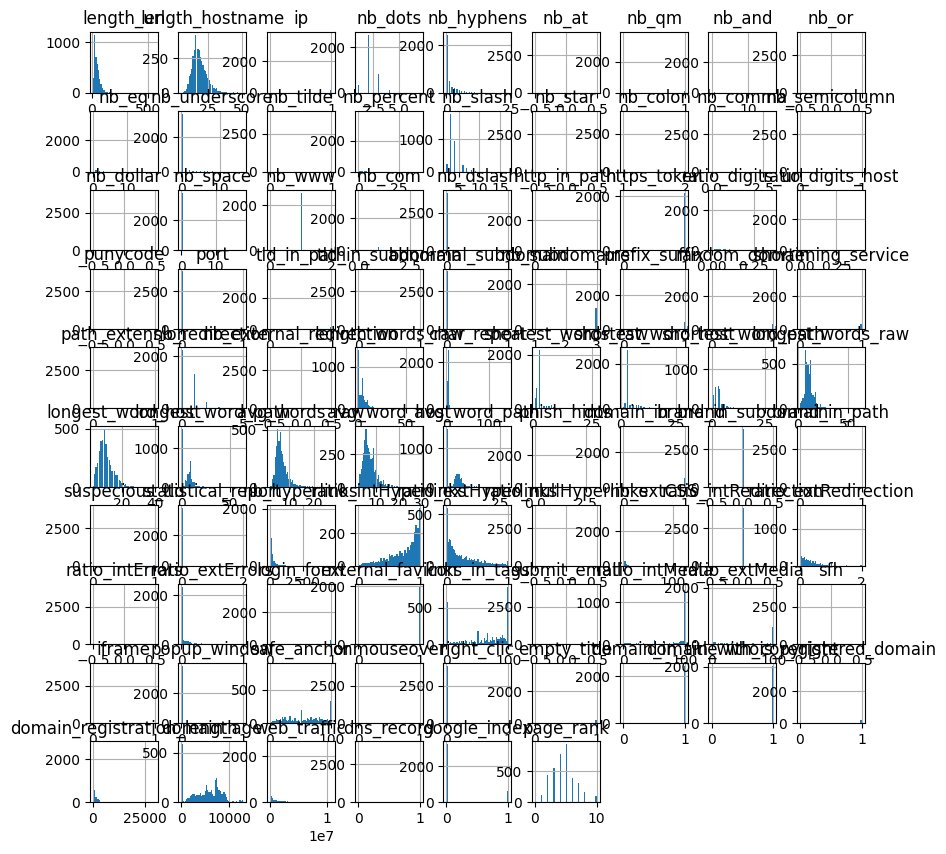

In [ ]:
df.loc[df['status']=='legitimate', :].hist(bins=50, figsize=(10, 10))

array([[<Axes: title={'center': 'length_url'}>,
        <Axes: title={'center': 'length_hostname'}>,
        <Axes: title={'center': 'ip'}>,
        <Axes: title={'center': 'nb_dots'}>,
        <Axes: title={'center': 'nb_hyphens'}>,
        <Axes: title={'center': 'nb_at'}>,
        <Axes: title={'center': 'nb_qm'}>,
        <Axes: title={'center': 'nb_and'}>,
        <Axes: title={'center': 'nb_or'}>],
       [<Axes: title={'center': 'nb_eq'}>,
        <Axes: title={'center': 'nb_underscore'}>,
        <Axes: title={'center': 'nb_tilde'}>,
        <Axes: title={'center': 'nb_percent'}>,
        <Axes: title={'center': 'nb_slash'}>,
        <Axes: title={'center': 'nb_star'}>,
        <Axes: title={'center': 'nb_colon'}>,
        <Axes: title={'center': 'nb_comma'}>,
        <Axes: title={'center': 'nb_semicolumn'}>],
       [<Axes: title={'center': 'nb_dollar'}>,
        <Axes: title={'center': 'nb_space'}>,
        <Axes: title={'center': 'nb_www'}>,
        <Axes: title={'center': 

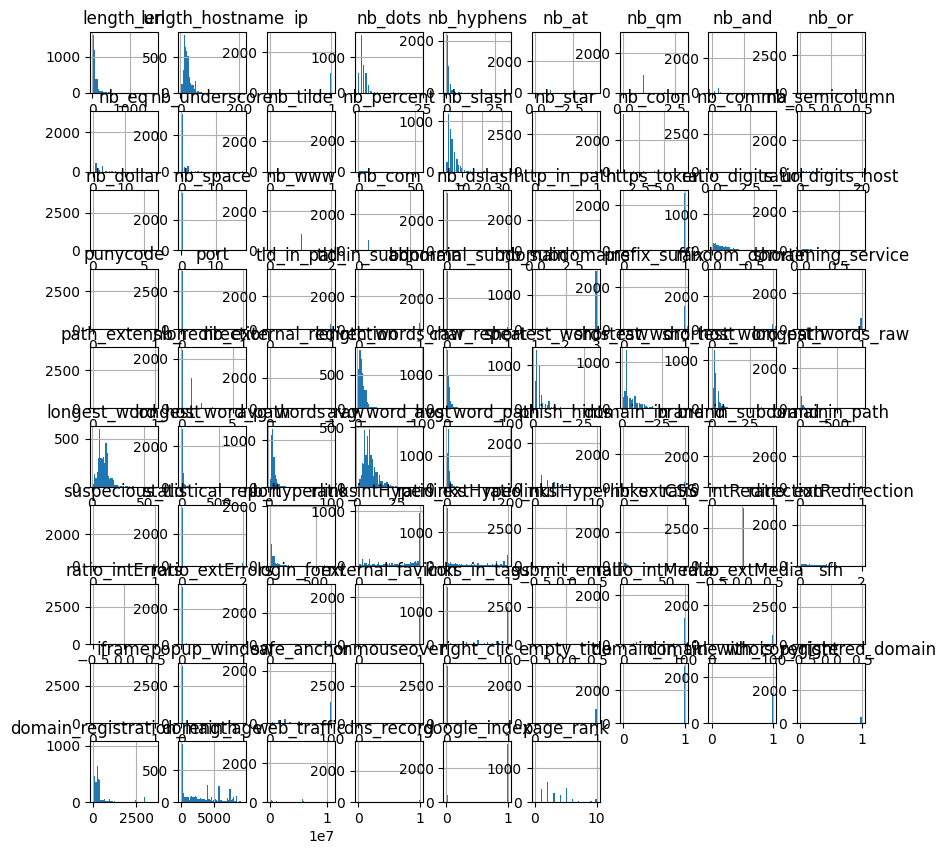

In [ ]:
df.loc[df['status']=='phishing', :].hist(bins=50, figsize=(10, 10))